In [1]:
import pandas as pd
import glob
import os
import matplotlib as plt

# Con esto se hace merge

In [2]:
# Ruta a la carpeta que contiene los archivos
ruta = 'Data/ExtraccionDomiVersionFinal/'

# Obtener todos los archivos que coincidan con el patrón
archivos = glob.glob(os.path.join(ruta, 'ListaCobroDetalle20*.csv'))

# Leer y concatenar todos los archivos en un solo DataFrame
df_detalle = pd.concat([pd.read_csv(archivo) for archivo in archivos], ignore_index=True)

df_lista = pd.read_csv(os.path.join(ruta, 'ListaCobro.csv'))
df_emisora = pd.read_csv(os.path.join(ruta, 'ListaCobroEmisora.csv'))
df_creditos = pd.read_csv(os.path.join(ruta, 'Capital_Pagare_FechaAperturaCredito.csv'))

C:\Users\chall\AppData\Local\Temp\ipykernel_23176\3636483435.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_detalle = pd.concat([pd.read_csv(archivo) for archivo in archivos], ignore_index=True)


In [3]:
df_detalle = df_detalle.merge(
    df_lista[['idListaCobro', 'fechaEnvioCobro']],
    on='idListaCobro',
    how='left'
)

df_detalle = df_detalle.merge(
    df_emisora[['idListaCobro', 'idEmisora']],
    on='idListaCobro',
    how='left'
)

df_detalle = df_detalle.merge(
    df_creditos[['idcredito', 'pagare', 'capital', 'fechaAperturaCredito']],
    left_on='idCredito',
    right_on='idcredito',
    how='left'
)

df_detalle.drop(columns='idcredito', inplace=True)


In [4]:
df_detalle.to_csv('Data/ExtraccionDomiVersionFinal/ListaCobroDetalleFinal.csv', index=False)
df_detalle.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,idEmisora,pagare,capital,fechaAperturaCredito
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,30/12/2013
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,30/09/2022,51,40383.33,19000.0,12/02/2014
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,30/09/2022,51,53135.94,25000.0,19/02/2014
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,26/02/2014
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,30/09/2022,51,26567.97,12500.0,21/03/2014


# Aquí esa el merge

Reiniciar y solo leer un dataframe

In [5]:
# Ruta a la carpeta que contiene los archivos
ruta = 'Data/ExtraccionDomiVersionFinal/'
df_lista = pd.read_csv(os.path.join(ruta, 'ListaCobroDetalleFinal.csv'))

C:\Users\chall\AppData\Local\Temp\ipykernel_23176\2748886643.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lista = pd.read_csv(os.path.join(ruta, 'ListaCobroDetalleFinal.csv'))


In [6]:
df_lista.head(10)

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,idEmisora,pagare,capital,fechaAperturaCredito
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,30/12/2013
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,30/09/2022,51,40383.33,19000.0,12/02/2014
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,30/09/2022,51,53135.94,25000.0,19/02/2014
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,26/02/2014
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,30/09/2022,51,26567.97,12500.0,21/03/2014
5,100613,118237,27169957,2,272.50,272.50,0.0,NaN,04,30/09/2022,51,21254.61,10000.0,22/04/2014
6,100613,136004,27169958,2,361.06,361.06,0.0,NaN,04,30/09/2022,51,28162.29,13250.0,26/08/2014
7,100613,137382,27169934,2,393.94,393.94,0.0,NaN,04,30/09/2022,51,51212.20,18160.0,01/09/2014
8,100613,137885,27169970,2,289.02,289.02,0.0,NaN,04,30/09/2022,51,37571.95,13323.0,12/09/2014
9,100613,149399,27169968,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,13/10/2014


In [7]:
df_lista['fechaEnvioCobro'] = pd.to_datetime(df_lista['fechaEnvioCobro'], errors='coerce')

df_lista = df_lista.sort_values(by='fechaEnvioCobro')

grupo_cliente = df_lista.groupby('idCredito')
grupo_cliente.head(10)


C:\Users\chall\AppData\Local\Temp\ipykernel_23176\1540265132.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_lista['fechaEnvioCobro'] = pd.to_datetime(df_lista['fechaEnvioCobro'], errors='coerce')


,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,idEmisora,pagare,capital,fechaAperturaCredito
52429,79678,165493,23794403,21,579.20,579.20,0.0,NaN,DD00028,2022-01-04,20,75295.35,26700.0,24/02/2015
52437,79678,380585,23794410,21,403.02,403.02,0.0,NaN,DD00028,2022-01-04,20,52391.94,19800.0,25/04/2017
52438,79678,392796,23794411,21,620.80,620.80,0.0,NaN,DD00031,2022-01-04,20,64563.20,25507.0,24/07/2017
52439,79678,399308,23794412,21,642.51,642.51,0.0,NaN,DD00031,2022-01-04,20,66820.53,26399.0,07/09/2017
52440,79678,413409,23794413,21,486.77,486.77,0.0,NaN,DD00028,2022-01-04,20,50624.08,20000.0,07/12/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10055578,162232,680026,44282132,21,239.92,239.92,0.0,NaN,4.0,2025-05-21,6,46064.64,17250.0,04/10/2023
10055574,162232,679749,44282128,21,515.43,515.43,0.0,NaN,4.0,2025-05-21,6,98961.60,37059.0,02/10/2023
10055582,162232,680349,44282136,21,328.54,328.54,0.0,NaN,4.0,2025-05-21,6,47309.04,21000.0,05/10/2023
10057308,162270,755287,44298923,2,623.98,623.98,0.0,NaN,4.0,2025-05-22,5,162237.40,57744.0,03/05/2025


In [8]:
columnas_requeridas = [
    'idCredito', 'montoCobrado', 'montoExigible', 
    'consecutivoCobro', 'fechaEnvioCobro'
]

# Validar estructura del DataFrame original, no del GroupBy
if not all(col in df_lista.columns for col in columnas_requeridas):
    raise ValueError("El DataFrame no tiene las columnas requeridas")


In [9]:
# Asegura que la columna de fecha esté en formato datetime
df_lista['fechaEnvioCobro'] = pd.to_datetime(df_lista['fechaEnvioCobro'], errors='coerce')

# Agrupar por idCredito
grupo_cliente = df_lista.groupby('idCredito')

# 1. Créditos nunca pagados (suma cobrada == 0)
creditos_nunca_pagados = grupo_cliente['montoCobrado'].sum().eq(0).sum()

# 2. Créditos pagados totalmente (suma cobrada >= monto exigible)
pagos_totales = grupo_cliente.apply(
    lambda x: x['montoCobrado'].sum() >= x['montoExigible'].max()
).sum()

# 3. Créditos con al menos un pago (>0 en cualquier cobro)
creditos_con_pagos = grupo_cliente['montoCobrado'].sum().gt(0).sum()

# 4. Cobros promedio por crédito
cobros_promedio = grupo_cliente.size().mean()

# 5. Créditos con alta fricción (más de cierto número de cobros y sin pago)
UMBRAL_INTENTOS = 3
alta_friccion = grupo_cliente.apply(
    lambda g: (len(g) > UMBRAL_INTENTOS) and (g['montoCobrado'].sum() == 0)
).sum()

# 6. Análisis temporal (solicitudes por día y por mes)
solicitudes_por_dia = df_lista.groupby(df_lista['fechaEnvioCobro'].dt.date)['idCredito'].nunique()
solicitudes_por_mes = df_lista.groupby(df_lista['fechaEnvioCobro'].dt.to_period('M'))['idCredito'].nunique()

# Mostrar resumen
print(f"""
Análisis de Créditos:
---------------------------------
1. Créditos nunca pagados: {creditos_nunca_pagados}
2. Créditos pagados totalmente: {pagos_totales}
3. Créditos con al menos un pago: {creditos_con_pagos}
4. Cobros promedio por crédito: {cobros_promedio:.1f}
5. Créditos con alta fricción: {alta_friccion}

Frecuencia de solicitudes:
- Máximo diario: {solicitudes_por_dia.max()} créditos
- Promedio mensual: {solicitudes_por_mes.mean():.1f} créditos
""")

# Opcional: Detalle de créditos con alta fricción
if alta_friccion > 0:
    print("\nDetalle de créditos con alta fricción:")
    creditos_problematicos = df_lista.groupby('idCredito').filter(
        lambda g: (len(g) > UMBRAL_INTENTOS) and (g['montoCobrado'].sum() == 0)
    )
    print(creditos_problematicos[['idCredito', 'consecutivoCobro', 'montoCobrado', 'fechaEnvioCobro']])


C:\Users\chall\AppData\Local\Temp\ipykernel_23176\3778825113.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pagos_totales = grupo_cliente.apply(
C:\Users\chall\AppData\Local\Temp\ipykernel_23176\3778825113.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alta_friccion = grupo_cliente.apply(



Análisis de Créditos:
---------------------------------
1. Créditos nunca pagados: 50810
2. Créditos pagados totalmente: 42400
3. Créditos con al menos un pago: 46420
4. Cobros promedio por crédito: 103.4
5. Créditos con alta fricción: 21167

Frecuencia de solicitudes:
- Máximo diario: 38292 créditos
- Promedio mensual: 13728.4 créditos


Detalle de créditos con alta fricción:
          idCredito  consecutivoCobro  montoCobrado fechaEnvioCobro
52429        165493          23794403           0.0      2022-01-04
52437        380585          23794410           0.0      2022-01-04
52438        392796          23794411           0.0      2022-01-04
52441        414884          23794414           0.0      2022-01-04
52442        416213          23794415           0.0      2022-01-04
...             ...               ...           ...             ...
10057113     755287          44291084           0.0      2025-05-22
10057112     755287          44291083           0.0      2025-05-22
1005703

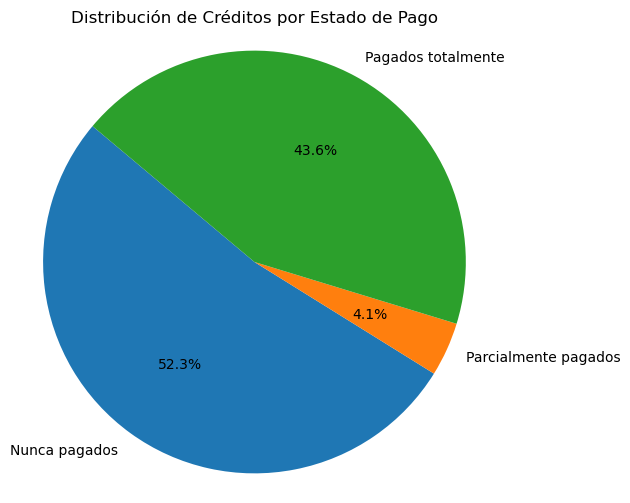

In [10]:
import matplotlib.pyplot as plt

estados = ['Nunca pagados', 'Parcialmente pagados', 'Pagados totalmente']
valores = [
    creditos_nunca_pagados,
    creditos_con_pagos - pagos_totales,
    pagos_totales
]

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=estados, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Créditos por Estado de Pago')
plt.axis('equal')
plt.show()


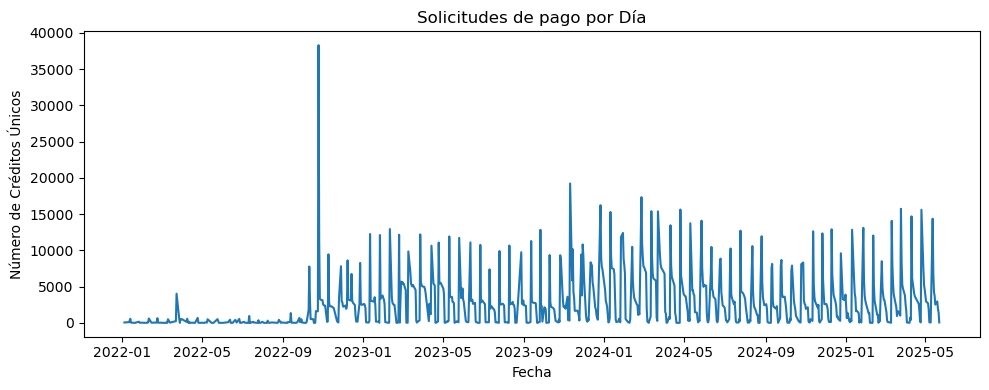

In [11]:
solicitudes_por_dia.plot(kind='line', figsize=(10, 4), title='Solicitudes de pago por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Créditos Únicos')
plt.tight_layout()
plt.show()


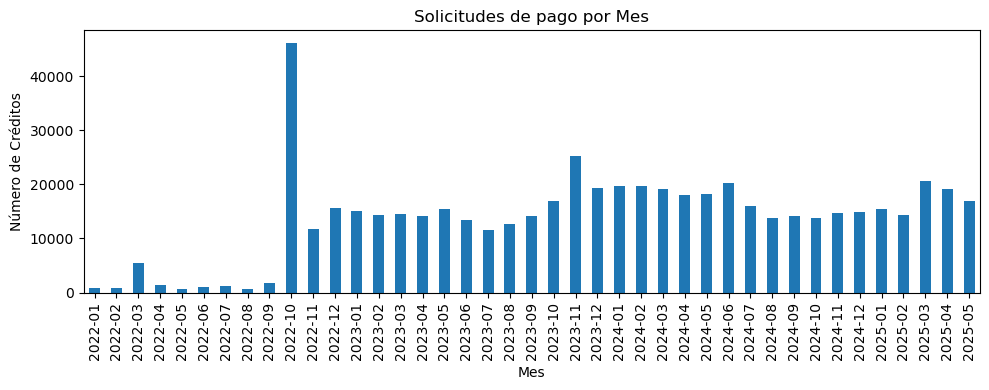

In [12]:
solicitudes_por_mes.plot(kind='bar', figsize=(10, 4), title='Solicitudes de pago por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Créditos')
plt.tight_layout()
plt.show()


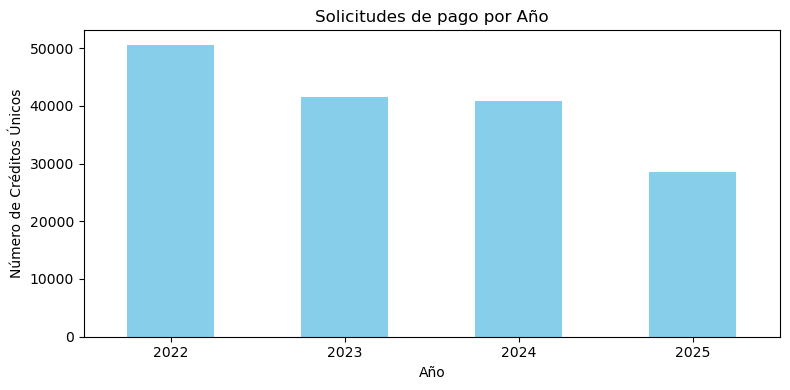

In [13]:
solicitudes_por_ano = df_lista.groupby(df_lista['fechaEnvioCobro'].dt.year)['idCredito'].nunique()

# Graficar
plt.figure(figsize=(8,4))
solicitudes_por_ano.plot(kind='bar', color='skyblue')
plt.title('Solicitudes de pago por Año')
plt.xlabel('Año')
plt.ylabel('Número de Créditos Únicos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

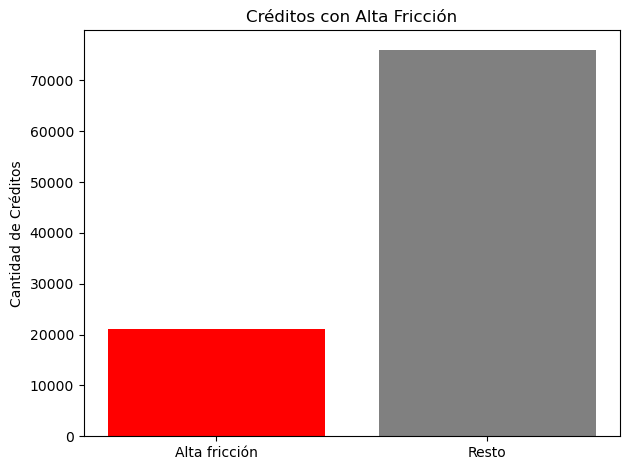

In [14]:
friccion_labels = ['Alta fricción', 'Resto']
friccion_valores = [alta_friccion, len(grupo_cliente) - alta_friccion]

plt.bar(friccion_labels, friccion_valores, color=['red', 'gray'])
plt.title('Créditos con Alta Fricción')
plt.ylabel('Cantidad de Créditos')
plt.tight_layout()
plt.show()

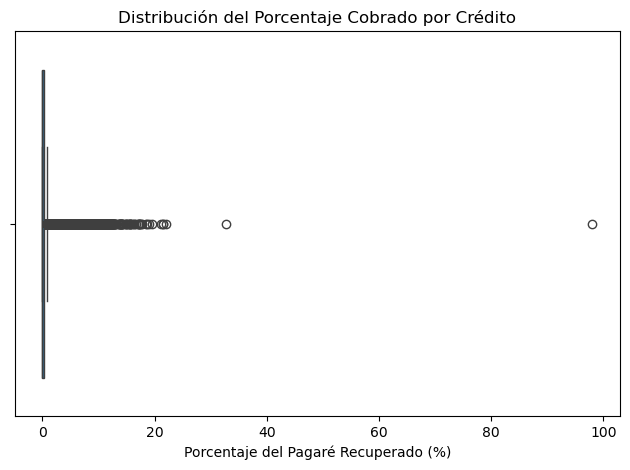

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el monto cobrado total y el monto exigible total por crédito
cobros_por_credito = grupo_cliente.agg({
    'montoCobrado': 'sum',
    'montoExigible': 'first'  # o 'max' si puede cambiar
}).reset_index()

# Agregar columna de porcentaje cobrado
cobros_por_credito['porcentaje_cobrado'] = cobros_por_credito['montoCobrado'] / cobros_por_credito['montoExigible'] /6

# Boxplot del porcentaje cobrado
sns.boxplot(x=cobros_por_credito['porcentaje_cobrado'])
plt.title('Distribución del Porcentaje Cobrado por Crédito')
plt.xlabel('Porcentaje del Pagaré Recuperado (%)')
plt.tight_layout()
plt.show()


C:\Users\chall\AppData\Local\Temp\ipykernel_23176\1318306801.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(ruta, 'ListaCobroDetalleFinal.csv'))
C:\Users\chall\AppData\Local\Temp\ipykernel_23176\1318306801.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fechaEnvioCobro'] = pd.to_datetime(df['fechaEnvioCobro'], errors='coerce')


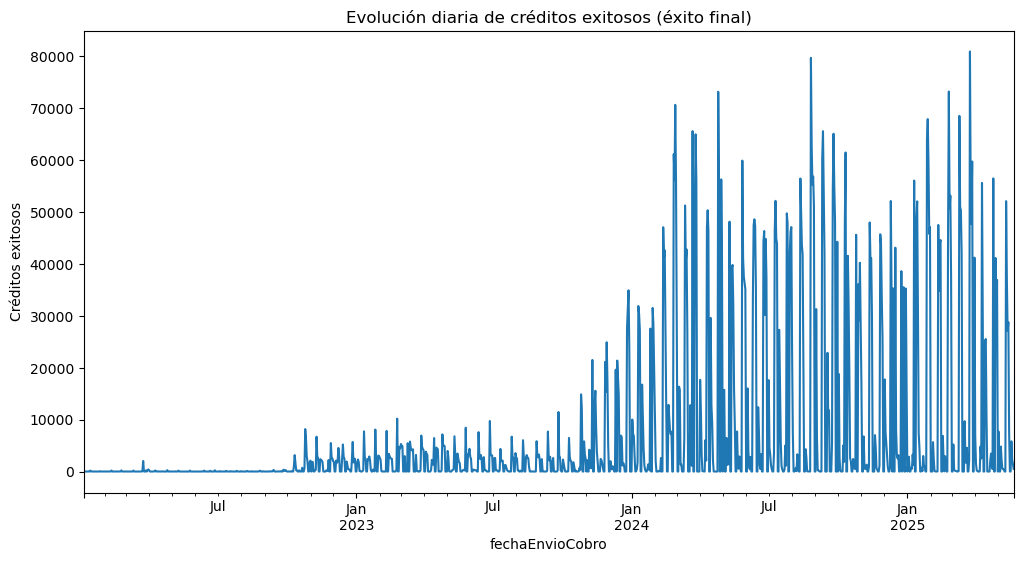

C:\Users\chall\AppData\Local\Temp\ipykernel_23176\1318306801.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tasa_exito = df_base.resample('M', on='fechaEnvioCobro')['exito'].mean()


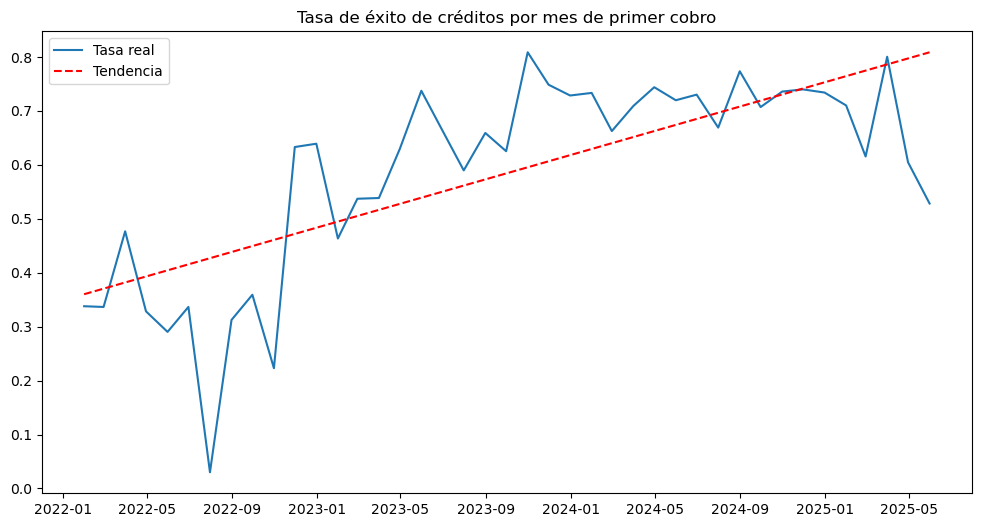

In [ ]:
# Configuración inicial
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Carga de datos
ruta = 'Data/ExtraccionDomiVersionFinal/'
df = pd.read_csv(os.path.join(ruta, 'ListaCobroDetalleFinal.csv'))
df['fechaEnvioCobro'] = pd.to_datetime(df['fechaEnvioCobro'], errors='coerce')

# 1. Evolución diaria de pagos exitosos (considerando éxito final por crédito)
# Primero determinamos qué créditos tuvieron éxito final
exito_final = df.groupby('idCredito')['montoCobrado'].sum() > 0

# Cruzamos con las fechas de envío
evolucion = df.merge(
    exito_final.rename('exito_final').reset_index(),
    on='idCredito',
    how='left'
).resample('D', on='fechaEnvioCobro')['exito_final'].sum()

# Gráfico
plt.figure(figsize=(12, 6))
evolucion.plot(title='Evolución diaria de créditos exitosos (éxito final)')
plt.ylabel('Créditos exitosos')
plt.show()

# 2. Tasa de éxito temporal (por fecha de primer cobro)
primeros_cobros = df.groupby('idCredito')['fechaEnvioCobro'].min().to_frame()
df_base = primeros_cobros.merge(
    exito_final.rename('exito'),
    on='idCredito'
)

tasa_exito = df_base.resample('M', on='fechaEnvioCobro')['exito'].mean()

# Tendencia con regresión polinomial
x = tasa_exito.index.to_julian_date().values.reshape(-1, 1)
y = tasa_exito.values
coef = np.polyfit(x.flatten(), y, 1)
tendencia = np.polyval(coef, x)

plt.figure(figsize=(12, 6))
plt.plot(tasa_exito.index, y, label='Tasa real')
plt.plot(tasa_exito.index, tendencia, 'r--', label='Tendencia')
plt.title('Tasa de éxito de créditos por mes de primer cobro')
plt.legend()
plt.show()

# 3-4. Métricas por crédito
metricas = df.groupby('idCredito').agg(
    total_cobrado=('montoCobrado', 'sum'),
    max_exigible=('montoExigible', 'max'),
    primer_envio=('fechaEnvioCobro', 'min'),
    ultimo_envio=('fechaEnvioCobro', 'max'),
    intentos=('montoCobrado', 'size')
)

metricas['porcentaje_recuperado'] = np.where(
    metricas['max_exigible'] > 0,
    (metricas['total_cobrado'] / metricas['max_exigible']) * 100,
    0
)

# 5. Clasificación pagos
conditions = [
    metricas['total_cobrado'] == 0,
    metricas['total_cobrado'] >= metricas['max_exigible']
]
choices = ['No pagador', 'Completo']
metricas['tipo_pago'] = np.select(conditions, choices, default='Parcial')

# 6. Clasificación clientes
def clasificar_cliente(row):
    if row['total_cobrado'] == 0:
        return 'No pagador'
    
    # Obtener datos del primer cobro exitoso
    primer_exitoso = df[
        (df['idCredito'] == row.name) & 
        (df['montoCobrado'] > 0)
    ].nsmallest(1, 'fechaEnvioCobro')
    
    if row['total_cobrado'] >= row['max_exigible']:
        if not primer_exitoso.empty and (primer_exitoso['consecutivoCobro'].iloc[0] == 1):
            return 'Pagador confiable'
        return 'Pagador tardío pero cumplido'
    
    if (primer_exitoso['montoCobrado'].sum() / row['max_exigible']) >= 0.5:
        return 'Pagador errático (gran esfuerzo)'
    
    return 'Pagador errático'

metricas['clasificacion'] = metricas.apply(clasificar_cliente, axis=1)

# Unir resultados al dataframe original
df_full = df.merge(
    metricas[['tipo_pago', 'clasificacion']],
    left_on='idCredito',
    right_index=True,
    how='left'
)

# Resultados finales
print("\nDistribución de tipos de pago:")
print(metricas['tipo_pago'].value_counts())

print("\nClasificación de clientes:")
print(metricas['clasificacion'].value_counts())

# Exportar resultados
df_full.to_csv('analisis_completo.csv', index=False)

In [ ]:
# Análisis de comportamiento recurrente
client_data = metricas.groupby('idCliente').agg({
    'clasificacion': lambda x: x.value_counts().to_dict(),
    'total_cobrado': 'sum',
    'intentos': 'mean'
})

# Ejemplo: Clientes que mejoran su comportamiento
client_evolution = metricas.groupby('idCliente')['clasificacion'].apply(
    lambda x: x.astype(str) + ' → ' + x.shift(-1).astype(str)
).dropna()  